# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [73,169,302]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,19899,5332,8713,8132,764,648
1,5414,717,2155,2399,69,750
2,2886,5302,9785,364,6236,555


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:** Yes to some degree it does, see details below!

1. Sample(#0): In this example, there are a few product categories that stick out compared to the means. Putting aside the "Milk" and "Grocery" categories, as they are roughly around the mean (5332 vs. 5796; 8710 vs. 7951) and less interesting than the others. On the one hand, "Fresh & Frozen" are significantly above their means and the latter even more than 2x and both of them are above the 75% mark. On the other hand, the remaining categories "Detergents_Paper" and "Delicatessen" are quite below the mean (764 vs. 2881; 648 vs. 1524) and below the 50% mark. Regarding this distribution, this customer might be more of a simple market, focused on basic food supply in fresh & frozen format incl. common grocery's. 
2. Sample(#1): This example is quite peculiar with all values below the average, and few being extremely low and close to min. values. This indicates to be rather a smaller corner shop or something like a deli. Quite noticeable is the extremely low amount (69) of "Detergents_Paper", which might mean they buy only for own use instead of reselling. Despite low amounts, "Frozen" products come closest to the mean (2399 vs. 3071), which might mean they need longer lasting inventories, e.g. for cooking, preparing food which would support a "Deli" theory for this customer.
3. Sample(#2): The laste example has a signifcant "Detergents_Paper" spend that is more than 2x the mean, while esp. "Fresh" and "Frozen" products are comparably low. This might be some sort of convenience store or even a drugstore of middle size where one can get basic, day-to-day groceries and toiletries.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Frozen', axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Frozen'], test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
prediction_test = regressor.predict(X_test)
score = r2_score(y_test, prediction_test)
print(score)

-0.21013589012491396


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

* Feature to predict: "Frozen"
* R^2 Score = -0.21
* As a negative score implies that the model fails to fit the data, this feature seems to be hard to predict using other features. Thus, it appears to be a necessary feature for identifying customers spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


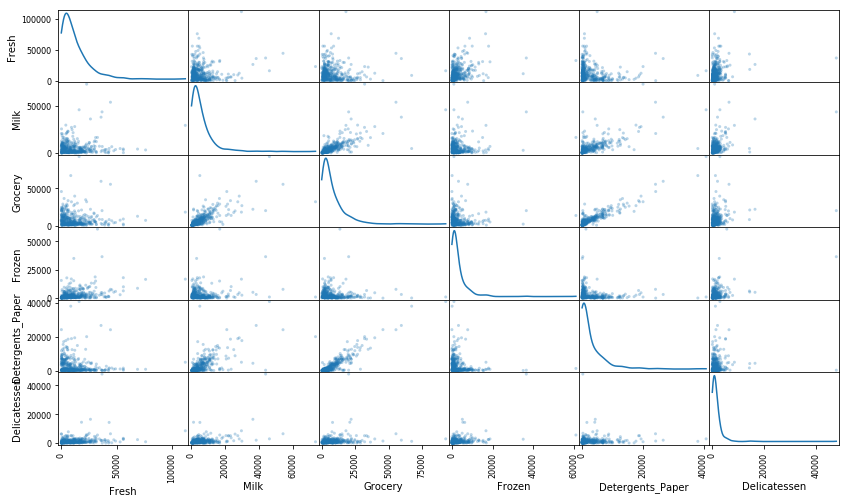

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

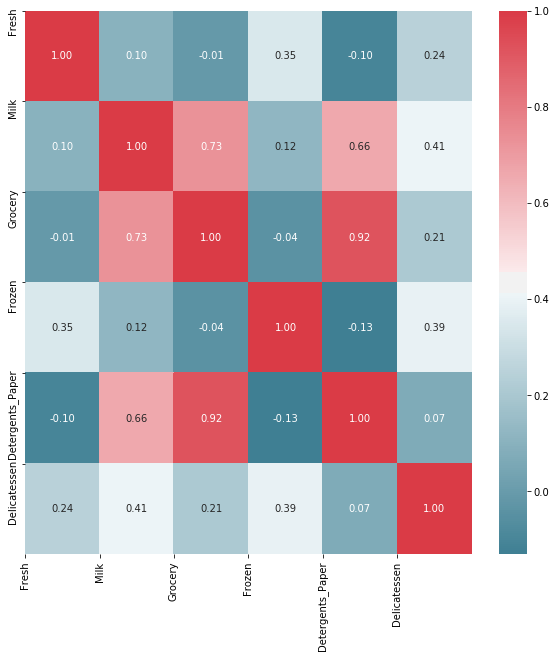

In [6]:
#Feature Correlation & Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

#Source: https://www.linkedin.com/pulse/generating-correlation-heatmaps-seaborn-python-andrew-holt

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  from ipykernel import kernelapp as app


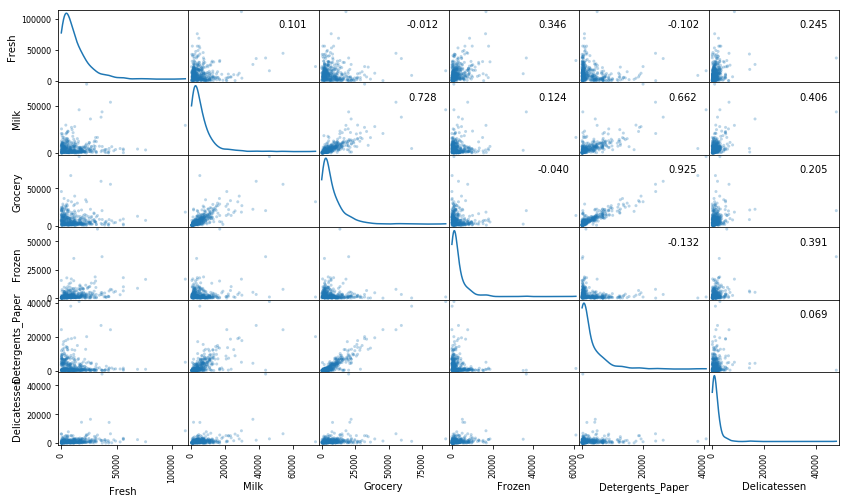

In [8]:
# Adding correlation to the plot as well
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

1. Data distribution:
Looking at the graphs of the matrix' diagonal line, the data points in all features seem to be distributed similarly, with many instances in the lower/ close to 0 region and getting sparse in the higher numbers. The graphs don't show a normal distribution as this would have similar mean and median values, i.e a bell-shaped curve. Looking into the mean and median values in the code cell below, reveals that the data is right-skewed (as right side of graph below) with mean values for all features higher than medians. This suggests that all features have outliers, as they define the direction of the skew (going to the right like the high value outliers). The graphs in the matrix somewhat indicate this assessment already.

2. Pairs with correlation:
Yes, I identified three pairs that exhibit some degree of correlation. Already in the scatter matrix you can see a distribution around a diagonal, i.e. points tend to go up for both features (see e.g. for 'Grocery' & 'Detergents_Paper'). Feature correlations with the corr()-method and a heatmap visualization confirm that there are pairs with a correlation of up to 0.92 (1=max). The three pairs are: 
 - 'Grocery' & 'Detergents_Paper': high correlation (0.92)
 - 'Milk' & 'Grocery': high correlation (0.73)
 - 'Milk' & 'Detergents_Paper': some correlation (0.66)

3. Relevance of previosly picked feature:
This confirms my assessment of 'Frozen' being a relevant feature for prediction as there seem to be no significant correlation with any other feature.
4. How is data distributed:
Data points in 'Frozen' compared to all other features is distributed fairly arbitrarily. There is no pattern that you might draw from easily, e.g. that if 'Frozen' articles go, other articles go down or up as well. It seems more that data is spread more abitrarily around the first third of the graphs, with some outliers for the 'Frozen' feature (high values).


In [12]:
# Checking if/how data is skewed
print(data.mean())
print(data.median())

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64
Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64


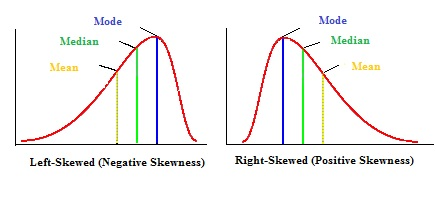

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead


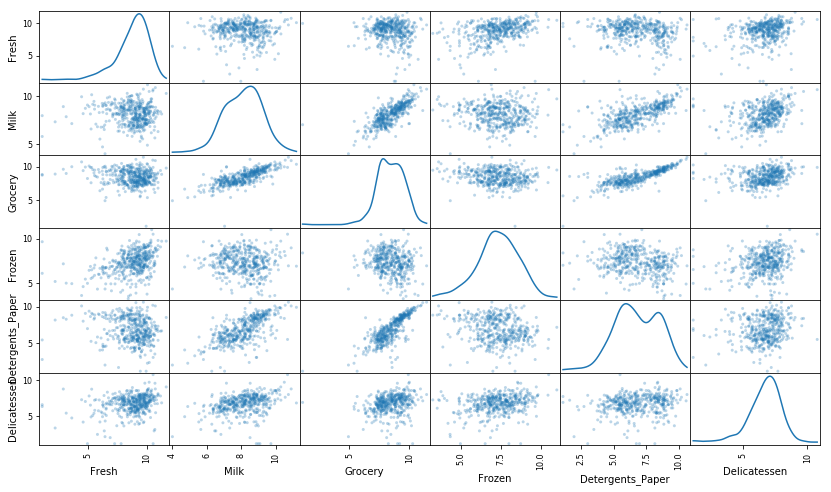

In [14]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [15]:
# Display the log-transformed sample data
display(log_samples)
for feature in log_samples.keys():
    print(log_samples[feature].values)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.898425,8.581482,9.072571,9.003562,6.638568,6.473891
1,8.596743,6.575076,7.675546,7.782807,4.234107,6.620073
2,7.967627,8.575839,9.188606,5.897154,8.738094,6.318968


[9.89842476 8.59674347 7.96762674]
[8.58148168 6.57507584 8.57583939]
[9.07257144 7.675546   9.18860588]
[9.00356217 7.78280726 5.89715387]
[6.63856779 4.2341065  8.73809423]
[6.4738907  6.62007321 6.31896811]


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [17]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature].values, 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66, 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

Yes, the datapoints 65 (Fresh, Frozen), 66 (Fresh, Delicatessen), 75 (Grocery, Detergents_Paper), 128 (Fresh, Delicatessen) & 154 (Grocery, Delicatessen, Milk) considered outliers for more than one feature.
I believe that this outliers should be removed. The fact that they are outliers in multiple categories suggests that they are a different, but rare type of customer, maybe with some special needs or just unusual combination of products needed. For k-means, these outliers could be a problem. As the loss is calculated based on the distance, being an outlier on several dimensions could thus increase the loss significantly. Eventually, k-means could even place another centroid to the outlier in order to reduce the loss. So to make sure, that k-means is not affected by this in clustering the segments, I will remove the datapoints mentioned above.  

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

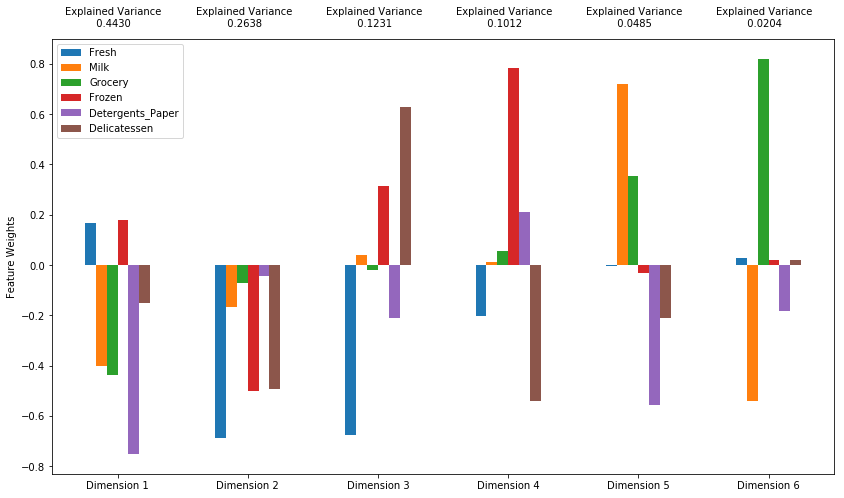

In [18]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

* The first and second principal component explain 0.708 = 70.8% of the variance (0.4380 + 0.2700) in total.
* The first four components explain 0.7080 + 0.1222 + 0.1009 = 0.9311 = 93.11% of the variance.
* Dimension 1: this dimension already covers almost half (0.438=~44%) of the cumulative variance alone. The feature "Detergents_Paper" stands out in its representation with a feature weight of almost -0.8. Further, two other features - "Milk & Grocery" - are each well represented as well with feature weights around -0.4. All three of them are negatively correlated to the component. If anyone of them decrease, the other tend to decrease as well and all of them will make the component increase.
* Dimension 2: This dimension explains a solid fourth (0.27) of the overall variance. The three features "Fresh", "Frozen", "Delicatessen" stand out in particular with high negative weights around -0.5 to -0.7. It is also an usual dimension as every feature is represented with negative weights (inversely proportional), i.e. decrease in feature value will increase the component. This also means that all feature vary together in this dimension, i.e. if one decrease the others tend to decrease as well.
* Dimension 3: With roughly an eighth (0.122) of cumulative variance explained, dimension three is the first one that has higher positive weights for features "Frozen" (~0.3) as well as "Delicatessen" (~0.6). Worth mentioning here is also "Fresh", which is represented well with a high negative weight of ~0.7. So all three have some sort of correlation and the latter two also with a higher magnitude. Another thing that is worth to mention is that some feature weights start to be very small such as for "Grocery", thus having almost no correlation with the component.
* Dimension 4: Still covers 10% of the overall variance explained. Here are "Frozen" (~0.8) and "Delicatessen"(~-0.5) are well represented with high weights, in particular the former, but in opposite 'direction' and thus are inversely correlated.
* Dimension 5 & 6: Contribution towards the cumulative variance explained from both dimensions is very small and <5% each (<7% combined). Well represented features in the former are "Milk"& "Grocery" (positive weights) as well as "Detergents_Paper" & "Delicatessen" (negative weights). The remaining two are close to zero and become neglible. The last dimension has very good representation with record high weights for "Grocery". Some considerable negative weights for "Milk" and to some degree also "Detergents_Paper", however, all the remaining are again almost zero in their weights.
* Regarding customer spending: D1 best represent customer spending around "Fresh" and "Frozen" products e.g. like local markets. D2 best represent rather classical supermarkets with higher spendings on quick turnarounds such as "Milk", "Grocerys" and "Detergents_Paper" as those are far less negatively correlated than the other features. D3 can be a good measure for "Frozen" and "Delicatessen" spent and specifically negatively correlated with spending on "Fresh" products. D4 best represents customers spending a lot on "Frozen", esp. when they also spend less on "Delicatessen" and "Fresh" products.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.1922,-1.6200,-0.3360,1.2134,0.6207,0.3501
1,2.9590,0.3480,0.7086,-0.1663,0.0364,0.6660
2,-2.2878,1.2394,-0.5511,-0.3016,-0.3738,-0.0578


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [20]:
# TODO: Apply PCA by fitting the good data with only two dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [21]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.1922,-1.6200
1,2.9590,0.3480
2,-2.2878,1.2394


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

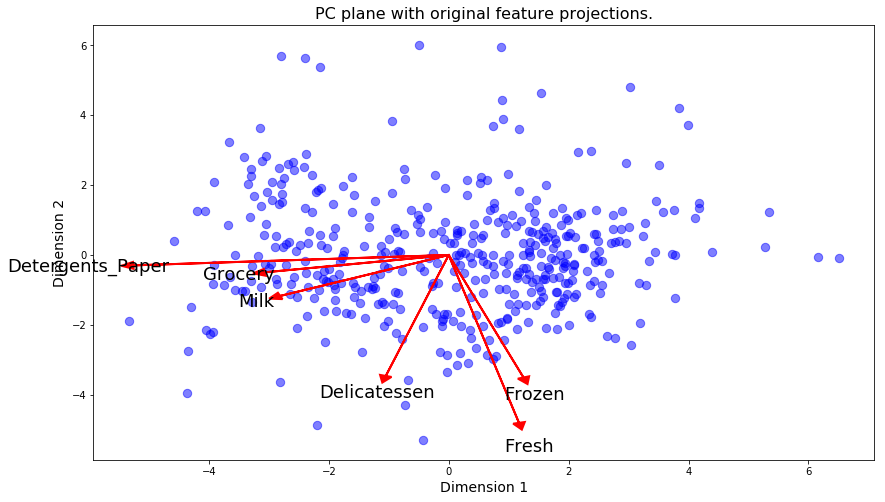

In [22]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

1. Advantages using K-Means: it will look for clear boundaries, i.e. a "hard clustering" where a data point can only belong to one cluster. This can be very important depending on the use case, e.g. when any data point can only be one single type of class, type, category, species etc. Further, k-means builts on several assumptions such as balanced cluster sizes within the dataset (and similar density), that features have a rather similar variance within a cluster and are also independent of each other. All of this makes k-means fairly easy to work with and to implement. Also, the results are rather easy to 

2. Advantages using Gaussian Mixture Model: it is more flexible in terms of cluster covariance, which means that each cluster can have an unconstrained covariance structure. That allows for a variety of forms in distribution of points such as of elongated or twisted clusters instead of just spherical. Cluster assignment is therefore more flexible and, also, points can be part of more than just one cluster. In GMM a point can be part of each cluster, but just to a different degree, whereas in K-means it can only belong to one. However, depending on the task, mixed membership may be more appropriate.

3. Chosen algorithm: from what I have seen so far regarding the wholesale customer dataset, it seems unlikely that you can easily put every data instance into only one distinct, spherical shaped cluster. The data complexity with data points that can be similar in their characteristic (e.g. similar spent pattern/distribution and still different types of customers) makes hard clustering rather impractical. I would suggest to go with GMM in order to get more flexibility in how cluster boarders are drawn and also allow for a probability measure to which clusters a data point most likely belongs.

Sources: 
* https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm
* https://www.quora.com/What-are-the-advantages-of-K-Means-clustering

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [30]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
clusterer = GaussianMixture(n_components=2, random_state=42).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data, preds)
print(score)

0.4219168464626149


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

1. 2 Clusters = 0.422
2. 3 Clusters = 0.404
3. 4 Clusters = 0.293
4. 5 Clusters = 0.300
5. 6 Clusters = 0.326
6. 7 Clusters = 0.324

The best silhouette score (0.422) is achieved with three clusters!

* UPDATE: numbers were updated after one missing outlier for more than one features (index 128) was identified and removed from good_data and thus reduced_data set. *The best silhouette score of same amount (0.422) now is achieved with 2 clusters instead of 3.* This is adjusted in the code and visualizations below.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

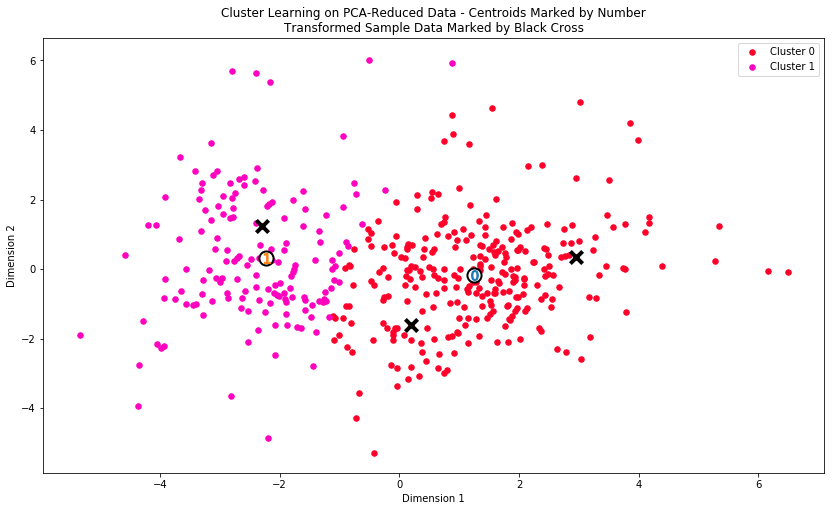

In [31]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [32]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

The mean values for the various features were the following:
* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

The customer segments are quite distinctive. Looking closer at the data, the following assumptions can be made:
* Segment 0: this segment represents establishments that are usually lower in average purchases compared to the overall means. In particular, product categories such as "Detergents_Paper" (362 vs. 2881 = ~1/8), "Grocery" (2827 vs. 7951 = ~1/3) and "Milk" (2190 vs. 5796 = ~37%) are less in demand for this type of customers. Products from the "Fresh", "Frozen" and "Delicatessen" are also below their averages, however, their proportion is still above the 50% and in the former case even over 80% of it. So we might conclude, that the overall purchase and demand from this segment is lower, indicating towards rather cafes or local markets/shops, focused on fresh foods, some supply of frozen, longer lasting products as well as a selection of delicatessen.
* Segment 1: this is a very interesting one. Categories such as "Milk, Grocery and Detergents_Paper" are standing out considerably compared to their averages (140%, 155% & 162% respectively, of their average). Whereas "Fresh" & "Frozen" products are merely at around 30%, and "Delicatessen" at about 2/3. I would suggest that this segment includes primarily supermarkets, convenience & grocery stores with high turnovers of rather common groceries and toiletries.

* UPDATE: the following segment is not suggested anymore as number of cluster was changed to two due to the silhouette score update above.
Segment 2: the last one is quite interesting as it represents customer with very low spendings, usually around 10-20% of the mean values across all features. Customers in this cluster could be small (corner shops), deli or restaurant owners or something like specialized boutiques. 

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [33]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [34]:
# The chosen samples for better comparison:
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,19899,5332,8713,8132,764,648
1,5414,717,2155,2399,69,750
2,2886,5302,9785,364,6236,555


**Answer:**

* Sample 1 and 2 are best represented through cluster 0: like segment 0, they could both represent small- to medium sized shops or (super) markets that have a wide or even full sortiment, but with a relatively higher demand and spend on categories suchs "Fresh", "Frozen" and "Delicatessen" products, or food in general. The samples themselves might represent different sizes of customers, as Sample 1 has 3-4x spend (with an exception in Delikatessen), however, the ratio overall is compareable meaning that it might be a similar establishment but just another size (e.g. local cafe vs. restaurant (chains)). In this sense, the predictions for these samples can be considered as consistent.(However, one could also argue that a segmentation/clustering on spend and thus on size of establishment could make more sense.)
* Sample 3 is best represented through cluster 1: this sample is very much consistent with the description of Segment 1 establishments. It has an overproportional high spent for "Milk"(5302 vs 5796 mean vs. 8211 segment avg.) , "Grocery" (9785 vs. 7951 mean vs. 12357 segment avg.) and even more so for "Detergents_Paper" (6236 vs. 2881 mean vs. 4675 segment avg.) and this is true for the segment on average as shown by the numbers (segment avg. all higher than mean). So the prediction for this sample is very consistent as it quite likely represents a grocery store or supermarket.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The distributor could look into a segments buying pattern, e.g. related to the amounts being purchases esp. relative to each other and its whole spent. So for instance, if a customer segment has on average a relatively high spent on food products, esp. from a "Fresh" category, the chance is higher that they would not react very positive, as they might depend on daily, fresh deliveries. This could be e.g. segment 0/cluster 0.
In contrast, if a customer segment on average purchases high amounts of "Grocerys" & "Detergents_Paper" products that might not be highly dependent on daily turnover times, it might be an indicator that a 3 days a week delivery cycle might be perfectly fine.
It is clear that we cannot assume that change affects all customer equally through the different segments. The buying pattern that we based our segmentation upon indicates that customers in different segments might operate in a different way (sortiment, turnover times, daily amounts sold etc.). The customer segmentation can be used to create a hypothesis of which type of customers could value changes to products or services, an A/B test within that segment can then quickly show if that type of customer react rather positive or negative to a certain change.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

A supervised learner (such as Decision Tree/Random Forest) could, for instance, learn which spent levels in each product category most likely represent which customer segment. In order to label the new customers, this learner - or in this case classifier - would just need the estimates for anticipated annual spending of each product category and could then predict the label, i.e. the cluster or customer segment such as Segment 0,1,2 which in this case is the target variable. This would be a multi-class or multi-label classification problem.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

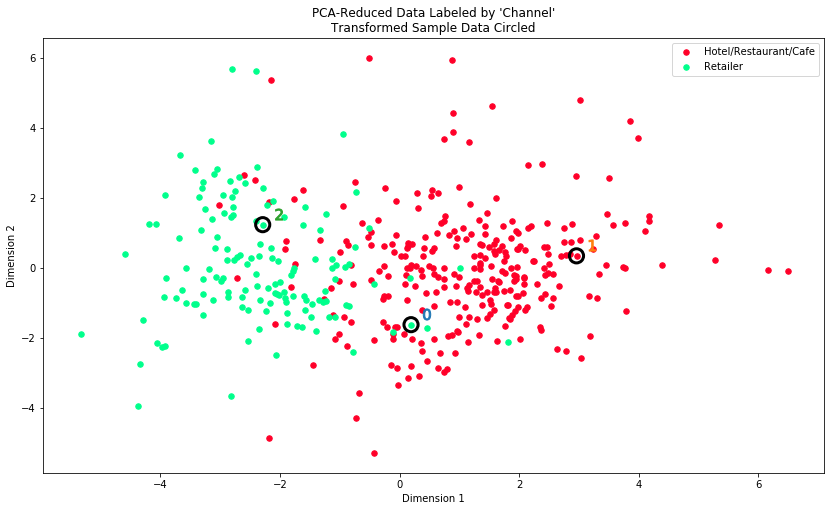

In [35]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* My choice of clustering algorithm and number of clusters are somewhat compareable to this distribution with two customer segments. In general, I would argue that my solution identified those two distinct clusters of Restaurant/Cafes (I didn't think of hotels) and retailers (=Grocery stores/supermarkets). However, the two main differences would be that I had one segment more (which in terms of establishments I was seeing as something like bistros/delis, specilized botiques or the like) and that the sample 0 was predicted to be part of the red segment, i.e. I was therefore interpreting it as being rather a cafe or restaurant, but simply on a bigger size (big restaurant or chain). In hindsight, I would say that the third segment wasn't really needed, however, I was blindly following the highest silhouette score even though it was very minimal (0.422 vs. 0.419 for two clusters).
* Yes, there are. These segment splits would happen primarily on Dimension 1 axis. Every data point that has lower values than ~-3 in dimension 1, can be considered purely as 'Retailer'. Likewise, data points with >2 in dimension 1 can be considered as purely 'Hotels/Restaurants/Cafes'.
* As already mentioned above, I would consider these classficiations as mostly consistent with my customer segments. My third additional segment wasn't really needed, so in hindsight I would have picked two segments. One thing that stands out in this distribution and classificiation, is that both segments are to some degree intertwined into each other in this representation, whereas my clusters had rather strict border lines. This might be something to finetune in the clustering algorithm and was actually one of the reasons I picked GMM, to give more flexibility to cluster forms and memberships.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.